"SPL Vertical"													
 ['On-Axis', '10°', '20°', '30°', '40°', '50°', '60°']


<AxesSubplot:xlabel='Frequency'>

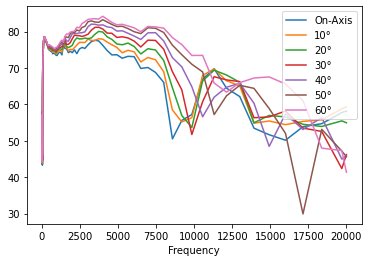

In [1]:
import numpy as np
import pandas as pd

path = 'bose.txt'
file = open(path, encoding='UTF-8')
headers = file.readlines()[:3]
title = headers[0]
curves = headers[1].split('\t\t')
# modify every element in an array
curves = [c.replace('"', '').strip() for c in curves]
# curves.insert(0, "Frequency")
print(title, curves)

dtbl = pd.read_table(path,  skiprows=2)
freq = dtbl.iloc[:, 0]
freq = [float(f.replace(',', '').strip()) for f in freq]
dtbl = dtbl.iloc[:, [i%2==1 for i in range(len(dtbl.columns))]]
dtbl.columns = curves
dtbl['Frequency'] = freq

dtbl.plot(x = "Frequency")

## offset

<AxesSubplot:xlabel='Frequency'>

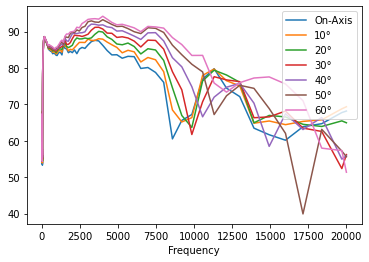

In [2]:
dtbl2 = dtbl

offset = 10
dtbl2.iloc[:, 0:-1] = dtbl2.iloc[:, 0:-1].apply(lambda x: x+offset)

dtbl2.plot(x = "Frequency")

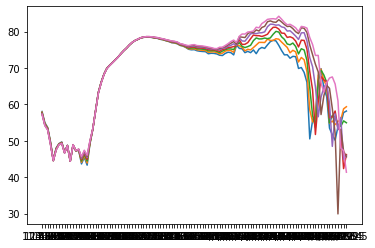

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
lines = []

for col in dtbl.columns[:-1]:
  line = ax.plot(dtbl["Frequency"], dtbl[col], label=col)
  lines.append(line)Ssss


In [10]:
dtbl['Frequency']

0       11.7188
1       12.4512
2        13.916
3       14.6484
4       15.3809
         ...   
104    15,999.8
105    17,148.2
106    18,379.4
107    19,698.5
108    19,999.5
Name: Frequency, Length: 109, dtype: object

In [60]:
x_target = 7549.604818
y_target = 71.169508
min_index = 0
max_index = len(dtbl['Frequency'])
count = 0
error = 0
while (max_index - min_index > 1):
    middle = int((max_index - min_index) / 2) + min_index
#     print("[", min_index, max_index, "]-", middle, dtbl['Frequency'][middle])
#     print(x_target > float(dtbl['Frequency'][middle]))
    if (x_target > float(dtbl['Frequency'][middle])):
        min_index = middle
    else:
        max_index = middle
print("[", min_index, max_index, "]-", middle, dtbl['Frequency'][middle])

if (x_target - dtbl['Frequency'][min_index] > dtbl['Frequency'][max_index] - x_target):
    x = max_index
else: x = min_index
x

error = float('inf') 
for i in range(len(dtbl.iloc[x])):
    print(error)
    if (abs(y_target - float(dtbl.iloc[x][i])) < error ):
        error = abs(y_target - float(dtbl.iloc[x][i]))
        target = float(dtbl.iloc[x][i])
        index = i

print(target, index)
dtbl.iloc[x]
        

[ 93 94 ]- 94 8000.24
inf
2.384707999999989
1.0988920000000064
1.0988920000000064
1.0988920000000064
1.0988920000000064
1.0988920000000064
1.0988920000000064
72.2684 1


On-Axis        68.7848
10°            72.2684
20°            74.9576
30°            77.5810
40°            79.7173
50°            80.9135
60°            81.2948
Frequency    7464.1100
Name: 93, dtype: float64